<a href="https://colab.research.google.com/github/Vishu-work/Car-Price-Prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [7]:
print(df.fuel.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64


<Axes: xlabel='fuel', ylabel='count'>

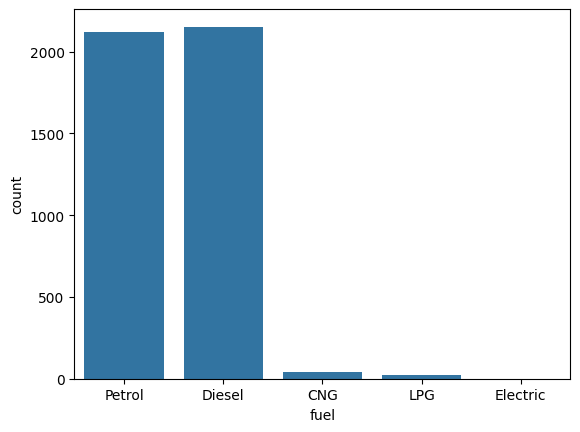

In [8]:
sns.countplot(x='fuel', data=df)

In [9]:
print(df.seller_type.value_counts())

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64


<Axes: xlabel='seller_type', ylabel='count'>

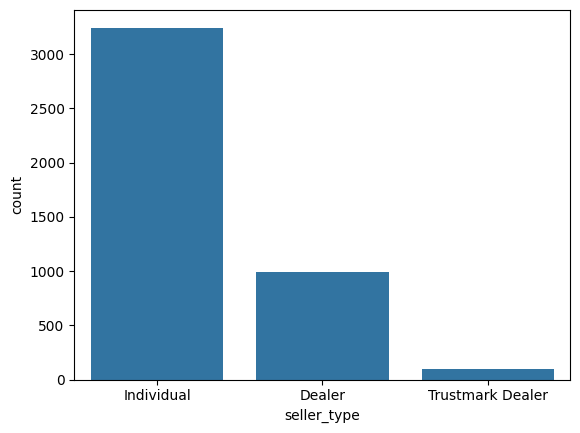

In [10]:
sns.countplot(x='seller_type', data=df)

In [11]:
print(df.transmission.value_counts())

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


<Axes: xlabel='transmission', ylabel='count'>

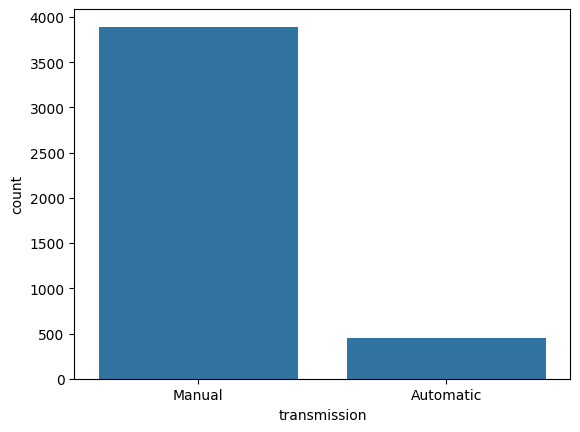

In [12]:
sns.countplot(x='transmission', data=df)

In [13]:
print(df.owner.value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


<Axes: xlabel='owner', ylabel='count'>

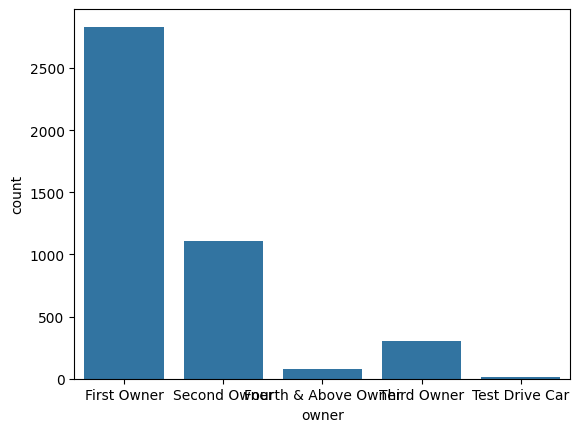

In [14]:
sns.countplot(x='owner', data=df)

<Axes: >

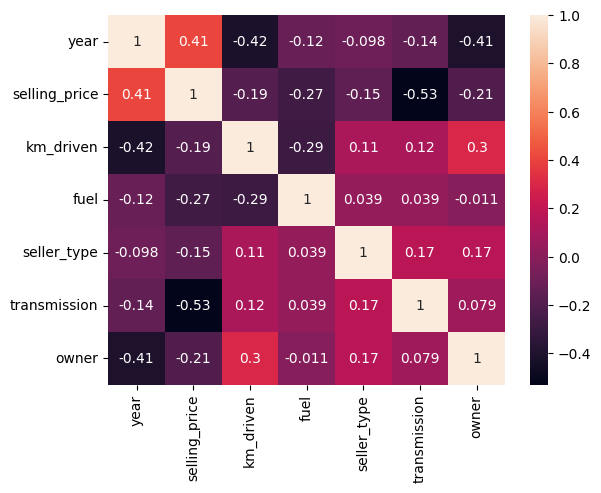

In [31]:
sns.heatmap(df.corr(), annot=True)

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.fuel=le.fit_transform(df.fuel)
df.seller_type=le.fit_transform(df.seller_type)
df.transmission=le.fit_transform(df.transmission)
df.owner=le.fit_transform(df.owner)

In [16]:
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())
print(df.owner.value_counts())

fuel
1    2153
4    2123
0      40
3      23
2       1
Name: count, dtype: int64
seller_type
1    3244
0     994
2     102
Name: count, dtype: int64
transmission
1    3892
0     448
Name: count, dtype: int64
owner
0    2832
2    1106
4     304
1      81
3      17
Name: count, dtype: int64


In [17]:
df = df.drop('name', axis=1)


In [18]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,4,1,1,0
1,2007,135000,50000,4,1,1,0
2,2012,600000,100000,1,1,1,0
3,2017,250000,46000,4,1,1,0
4,2014,450000,141000,1,1,1,2


In [19]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=lr.predict(x_test)

In [23]:
r2=r2_score(y_test,y_pred)

In [24]:
print("R² Score:", r2)

R² Score: 0.3939008529340018


In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2}")

R² Score: 0.49822262388713


In [26]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.34165371069218664


In [27]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.34165371069218664


In [34]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.4678826332092285


In [28]:
import joblib
joblib.dump(rf,'rf.pkl')

['rf.pkl']

In [29]:
!pip install gradio

In [30]:
import gradio as gr

model=joblib.load('rf.pkl')
features_names=['year','km_driven','fuel','seller_type','transmission','owner']

def predict_car_price(*inputs):
  input_df = pd.DataFrame([inputs], columns=features_names)
  prediction = model.predict(input_df)[0]

  return "Predicted Car Price: INR" + " " +str(round(prediction, 2))

inputs = [gr.Number(label=col) for col in features_names]

interface = gr.Interface(
    fn = predict_car_price,
    inputs = inputs,
    outputs = "text",
    title = "Car Price Predictor",
    description = "Enter the features of the car to predict its price."
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ba0454ee443c368f89.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
